In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import seaborn as sns
from scipy import stats

In [3]:
runs =[
    "SA", "SA_CA", 
    "SA_SR","SA_CM", "SA_CTRD", "MD",   
    "CG", "CG_MD"
]   

In [4]:
def get_ref_secondary():
    """returns a DataFrame containing all the reference structure values"""
    ref_df = pd.read_csv("../RAW_DATA/reference-stride.csv", index_col = 0)
  
    return ref_df

def make_secondary_df(run):
  
    df_3J95 = pd.read_csv(("../RAW_DATA/{}/3J95_stride.csv").format(run), index_col = "structure")
    df_3J96 = pd.read_csv(("../RAW_DATA/{}/3J96_stride.csv").format(run), index_col = "structure")
    df_5GRS = pd.read_csv(("../RAW_DATA/{}/5GRS_stride.csv").format(run), index_col = "structure")
    df_5HNY = pd.read_csv(("../RAW_DATA/{}/5HNY_stride.csv").format(run), index_col = "structure")
    df_5WCB = pd.read_csv(("../RAW_DATA/{}/5WCB_stride.csv").format(run), index_col = "structure")
    df_6ACG = pd.read_csv(("../RAW_DATA/{}/6ACG_stride.csv").format(run), index_col = "structure")
    df_6AHF = pd.read_csv(("../RAW_DATA/{}/6AHF_stride.csv").format(run), index_col = "structure")
    df_6IRF = pd.read_csv(("../RAW_DATA/{}/6IRF_stride.csv").format(run), index_col = "structure")
    df_6N1Q = pd.read_csv(("../RAW_DATA/{}/6N1Q_stride.csv").format(run), index_col = "structure")
    df_6N7G = pd.read_csv(("../RAW_DATA/{}/6N7G_stride.csv").format(run), index_col = "structure")
    df_6N8Z = pd.read_csv(("../RAW_DATA/{}/6N8Z_stride.csv").format(run), index_col = "structure")
    df_6R7I = pd.read_csv(("../RAW_DATA/{}/6R7I_stride.csv").format(run), index_col = "structure")
    df_6UBY = pd.read_csv(("../RAW_DATA/{}/6UBY_stride.csv").format(run), index_col = "structure")
    df_6UC0 = pd.read_csv(("../RAW_DATA/{}/6UC0_stride.csv").format(run), index_col = "structure")
    
    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
        df_6ACG,
        df_6AHF,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list

In [12]:
def make_stride_df(run, wrong_names=False):
    column_names = {"Helix" : "Sheet", "Sheet" : "Helix"}
    ref_df = get_ref_secondary()
    stride_df = make_secondary_df(run)
    ref = ref_df.div(ref_df["All"], axis = 0).mul(100).rename(columns=column_names)
    total_df = pd.DataFrame()
    for df in stride_df:
        if wrong_names:
            df = df.rename(columns=column_names)
        
        struct = "{}.pdb".format(df.index[1][0:4])
        
        df = df.iloc[:,1:6]
        df = df.div(df['All'], axis = 0).mul(100)

        new_df = pd.DataFrame()
        for index, value in ref.loc[struct].iteritems():
            add_df = df.loc[:,index].sub(value)
            new_df = pd.concat([new_df,add_df], axis=1)

        new_df.pop("All")
        total_df = pd.concat([total_df, new_df], ignore_index=True)
    return total_df

In [13]:
sheet_df = pd.DataFrame()
helix_df = pd.DataFrame()
turn_df = pd.DataFrame()
coil_df = pd.DataFrame()
for run in runs:
    df = make_stride_df(run)
    sheet_df = pd.concat([sheet_df, df["Sheet"]], axis = 1)
    sheet_df = sheet_df.rename(columns={"Sheet": run})
    
    helix_df = pd.concat([helix_df, df["Helix"]], axis = 1)
    helix_df = helix_df.rename(columns={"Helix": run})
    
    turn_df = pd.concat([turn_df, df["Turn"]], axis = 1)
    turn_df = turn_df.rename(columns={"Turn": run})
    
    coil_df = pd.concat([coil_df, df["Coil"]], axis = 1)
    coil_df = coil_df.rename(columns={"Coil": run})


Sheet 12.415695892090742
Helix 49.35622317596567
Turn 23.605150214592275
Coil 14.622930717351318
All 100.0
Sheet 17.029862792574658
Helix 47.07021791767554
Turn 23.64810330912026
Coil 12.251815980629539
All 100.0
Sheet 32.123987319478694
Helix 23.670306445931665
Turn 26.699542092286016
Coil 17.50616414230363
All 100.0
Sheet 18.594104308390023
Helix 38.2464096749811
Turn 28.72260015117158
Coil 14.436885865457294
All 100.0
Sheet 5.88235294117647
Helix 46.42289348171701
Turn 28.192898781134073
Coil 19.50185479597244
All 100.0
Sheet 20.682546953733393
Helix 23.63719651855245
Turn 35.40998625744389
Coil 20.27027027027027
All 100.0
Sheet 1.0422812192723696
Helix 40.117994100294986
Turn 39.1937069813176
Coil 19.646017699115045
All 100.0
Sheet 17.95595708639187
Helix 36.250705815923205
Turn 28.740824392998306
Coil 17.052512704686617
All 100.0
Sheet 12.698412698412698
Helix 47.24556489262371
Turn 20.26143790849673
Coil 19.794584500466854
All 100.0
Sheet 6.852075775896815
Helix 47.07779121322048

Sheet 5.88235294117647
Helix 46.42289348171701
Turn 28.192898781134073
Coil 19.50185479597244
All 100.0
Sheet 20.682546953733393
Helix 23.63719651855245
Turn 35.40998625744389
Coil 20.27027027027027
All 100.0
Sheet 1.0422812192723696
Helix 40.117994100294986
Turn 39.1937069813176
Coil 19.646017699115045
All 100.0
Sheet 17.95595708639187
Helix 36.250705815923205
Turn 28.740824392998306
Coil 17.052512704686617
All 100.0
Sheet 12.698412698412698
Helix 47.24556489262371
Turn 20.26143790849673
Coil 19.794584500466854
All 100.0
Sheet 6.852075775896815
Helix 47.07779121322048
Turn 32.204756146715035
Coil 13.865376864167676
All 100.0
Sheet 10.666378191259195
Helix 51.44958892254435
Turn 24.49156209433146
Coil 13.392470791864994
All 100.0
Sheet 4.157706093189964
Helix 56.344086021505376
Turn 25.089605734767023
Coil 14.408602150537634
All 100.0
Sheet 19.537037037037035
Helix 37.901234567901234
Turn 29.166666666666668
Coil 13.39506172839506
All 100.0
Sheet 19.44103194103194
Helix 37.7457002457002

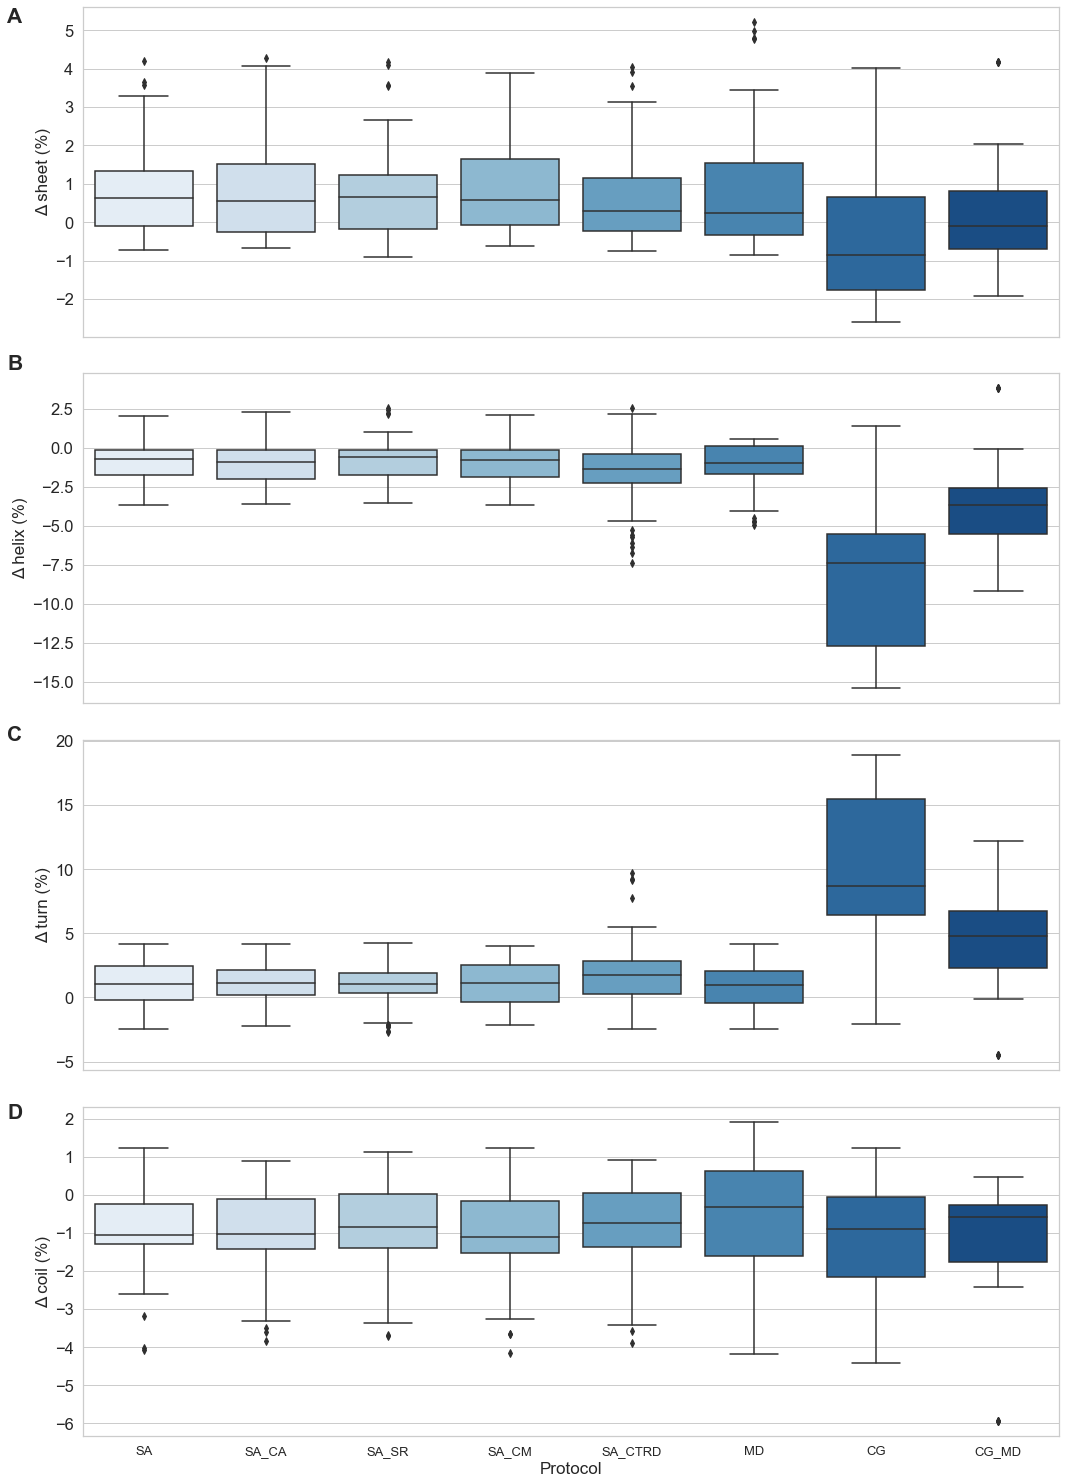

In [9]:
fig, ax = plt.subplots(nrows = 4, figsize = (15, 21))
sns.set(font_scale=1.5, style="whitegrid")

plot_sheet = sns.boxplot(data=sheet_df, ax=ax[0], palette="Blues")
plot_helix = sns.boxplot(data=helix_df, ax=ax[1], palette="Blues")
plot_turn = sns.boxplot(data=turn_df, ax=ax[2], palette="Blues")
plot_coil = sns.boxplot(data=coil_df, ax=ax[3], palette="Blues")

plot_sheet.set_xticks([])
plot_helix.set_xticks([])
plot_turn.set_xticks([])

plot_coil.set_xticklabels(runs, fontsize=13)

plot_sheet.set_ylabel("Δ sheet (%)", fontsize=17)
plot_helix.set_ylabel("Δ helix (%)", fontsize=17)
plot_turn.set_ylabel("Δ turn (%)", fontsize=17)
plot_coil.set_ylabel("Δ coil (%)", fontsize=17)
plot_coil.set_xlabel("Protocol", fontsize=17)

plot_sheet.text(-1.12,5.2,"A", fontsize=21, weight="semibold")
plot_helix.text(-1.12,5,"B", fontsize=21, weight="semibold")

plot_turn.text(-1.12,20,"C", fontsize=21, weight="semibold")
plot_coil.text(-1.12,2,"D", fontsize=21, weight="semibold")



plt.tight_layout()
# plt.savefig("supplemental_figure_3.pdf", dpi = 300, bbox_inches='tight')